# Assignment 1

In [14]:
import math
import matplotlib.pyplot as plt
from Library import *



# Question 1
### Solve $\exp(−x) − x = 0$ using fixed-point method, accurate up to 4 places in decimal.

In [15]:
# Define the function g(x), this has to be input by the user
def g1(x):
    return math.exp(-x)

initial_guess = 1.0
eps=1e-6

root, Num_iter_gaussian = fixed_point_method(g1, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 4)}")
print(f"Number of iterations performed: {Num_iter_gaussian}")


Root of the given equation: 0.5671
Number of iterations performed: 25


# Question 2
### Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal.
$$ \int^1_0 \sqrt{1+x^4} dx $$


In [16]:
# SIMPSON'S RULE

# Define the function f(x), this has to be input by the user
def f2(x):
    return math.sqrt(1 + x**4)

a = 0
b = 1
eps = 1e-7

Num_iter_simpson = calculate_N_s(f2, a, b, eps)
integral_simpson = int_simpson(f2, a, b, eps)
print(f"Value of the integral by Simpson's rule: {ROUND(integral_simpson, 6)}")
print(f"Number of iterations performed: {Num_iter_simpson}")


Value of the integral by Simpson's rule: 1.089429
Number of iterations performed: 30


In [17]:
# GAUSSIAN QUADRATURE

integral_gaussian, Num_iter_gaussian = Gaussian_quadrature(f2, a, b, eps)
print(f"Value of the integral by Gaussian quadrature: {ROUND(integral_gaussian, 6)}")
print(f"Number of iterations performed (order of P_n(x)): {Num_iter_gaussian}")


Value of the integral by Gaussian quadrature: 1.089429
Number of iterations performed (order of P_n(x)): 6


# Question 3
### Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01. Tabulate your results.
$$ y' = \dfrac{5x^2-y}{\exp(x+y)} \quad \text{and} \quad y(0)=1.0$$


In [18]:
def dydx(x, y):
    return (5*x**2-y)/(math.exp(x+y))

x0 = 0.0
xn = 5.0
y0 = 1.0

h1 = 0.5
h2 = 0.2
h3 = 0.05
h4 = 0.01

X1, Y1 = ODE_1D_RK4(dydx, y0, x0, xn, h1)
X2, Y2 = ODE_1D_RK4(dydx, y0, x0, xn, h2)
X3, Y3 = ODE_1D_RK4(dydx, y0, x0, xn, h3)
X4, Y4 = ODE_1D_RK4(dydx, y0, x0, xn, h4)


In [19]:
# Print the results
print("X1      Y1")
for order in range(len(X1)):
    print(f"{X1[order]:.2f}    {Y1[order]:.4f}")
print()

print("X2      Y2")
for order in range(len(X2)):
    print(f"{X2[order]:.2f}    {Y2[order]:.4f}")
print()

print("X3      Y3")
for order in range(len(X3)):
    print(f"{X3[order]:.2f}    {Y3[order]:.4f}")
print()

print("X4      Y4")
for order in range(len(X4)):
    print(f"{X4[order]:.2f}    {Y4[order]:.4f}")
print()


X1      Y1
0.00    1.0000
0.50    0.9132
1.00    1.0719
1.50    1.3498
2.00    1.6191
2.50    1.8382
3.00    2.0055
3.50    2.1298
4.00    2.2208
4.50    2.2868
5.00    2.3343

X2      Y2
0.00    1.0000
0.20    0.9378
0.40    0.9104
0.60    0.9267
0.80    0.9838
1.00    1.0716
1.20    1.1778
1.40    1.2920
1.60    1.4064
1.80    1.5162
2.00    1.6189
2.20    1.7131
2.40    1.7986
2.60    1.8754
2.80    1.9442
3.00    2.0053
3.20    2.0596
3.40    2.1077
3.60    2.1502
3.80    2.1876
4.00    2.2206
4.20    2.2497
4.40    2.2751
4.60    2.2975
4.80    2.3171
5.00    2.3342

X3      Y3
0.00    1.0000
0.05    0.9821
0.10    0.9656
0.15    0.9507
0.20    0.9378
0.25    0.9271
0.30    0.9189
0.35    0.9133
0.40    0.9104
0.45    0.9104
0.50    0.9131
0.55    0.9185
0.60    0.9267
0.65    0.9375
0.70    0.9507
0.75    0.9662
0.80    0.9838
0.85    1.0034
0.90    1.0246
0.95    1.0474
1.00    1.0716
1.05    1.0969
1.10    1.1231
1.15    1.1502
1.20    1.1778
1.25    1.2060
1.30    1.2344
1.35 

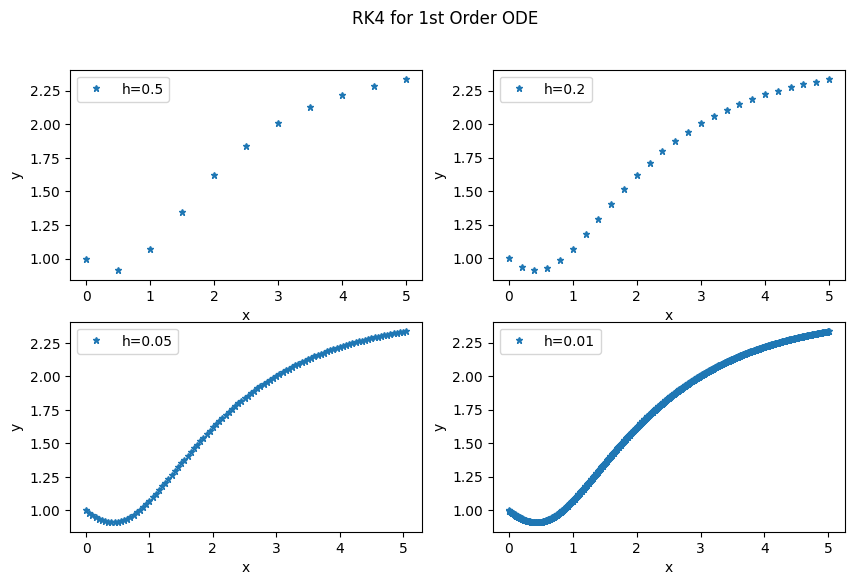

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(X1, Y1, '*', label='h=0.5', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 2)
plt.plot(X2, Y2, '*', label='h=0.2', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 3)
plt.plot(X3, Y3, '*', label='h=0.05', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 4)
plt.plot(X4, Y4, '*', label='h=0.01', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.suptitle('RK4 for 1st Order ODE')
plt.show()


# Question 4
### Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions
$$ u(0, t) = 0 = u(8, t) \quad \text{and} \quad x(x, 0) = 4x − \dfrac{x^2}{2} $$
### Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of $\alpha$ and inversion algorithm. Display the solution both in a table and a contour plot.



In [21]:
import matplotlib.pyplot as plt

def init_cond(x):
    return 4*x - x**2/2

def plot_diff():
    plt.figure(figsize=(5, 4))
    plt.imshow(solution, extent=[0, Lagrange_func, 0, T], aspect='auto', origin='lower', cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title('Heat Diffusion (Crank-Nicolson Method)')
    plt.xlabel('Time')
    plt.ylabel('Length')

Lagrange_func = 8.0         # Length of the rod
T = 5.0         # Total time
dx = 0.1        # Spatial step size
dt = 0.01       # Time step size
Diff = 4       # Thermal diffusivity

solution, spatial_grid, time_grid = crank_nicolson_heat_diffusion(Lagrange_func, T, dx, dt, Diff, init_cond)


Since the Crank-Nicholson method is stable for $\alpha > 0.5$ too, unlike other explicit methods, we can choose any convenient $\alpha$. Here we have taken 
$$ \alpha = \text{Diff} \times \dfrac{\Delta t}{\Delta x^2} = 4 \times \dfrac{0.01}{0.1^2} = 4 $$


Solution: [[0.         0.385      0.24333333 ... 0.01679485 0.01669654 0.01659881]
 [0.395      0.5675     0.61833333 ... 0.03356504 0.03336857 0.03317326]
 [0.78       0.84625    0.9225     ... 0.05028598 0.04999164 0.04969902]
 ...
 [0.78       0.84625    0.9225     ... 0.05028598 0.04999164 0.04969902]
 [0.395      0.5675     0.61833333 ... 0.03356504 0.03336857 0.03317326]
 [0.         0.385      0.24333333 ... 0.01679485 0.01669654 0.01659881]]


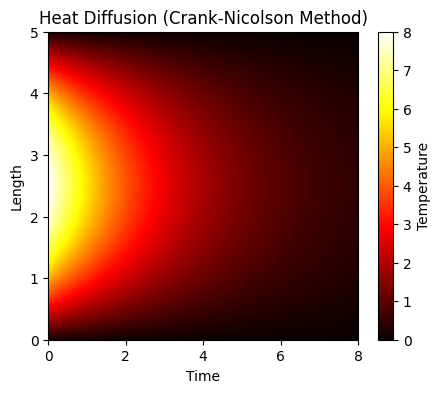

In [22]:
# Tabulate the solution
print(f"Solution: {solution}")

# Plot the diffusion equation solution
plot_diff()
plt.show()


# Question 5
### Solve the Poisson’s equation $u_{xx} + u_{yy} = xe^y$ in a $6^2$ grid with boundary conditions
$$ u(0, y) = 0 \quad \text{and} \quad u(2, y) = 2e^y $$
$$ u(x, 0) = x \quad \text{and} \quad u(x, 1) = xe $$
### Display the solution both in a table and a 3-D plot.

In [23]:

def get_BC_poisson(n_x, n_y, x, y):

    # Initial guess
    u = [ [ 0 for j in range(n_y)] for i in range(n_x)]

    # Apply boundary conditions
    for j in range(n_y):
        u[0][j] = 0
        u[-1][j] = 2 * math.exp(y[j])

    for i in range(n_x):
        u[i][0] = x[i]
        u[i][-1] = x[i] * math.exp(1)

    return u


In [42]:
# Set parameters
n_x = 6
n_y = 4
x_length = 2.0
y_length = 1.0

# Solve Poisson equation with boundary conditions
X, Y, u = poisson_eqn_solver(n_x, n_y, x_length, y_length, get_BC_poisson)

# Print the results in matrix like looking form
print("X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t")
for j in range(n_y):
    for i in range(n_x):
        print(f"{X[i]:.2f}", end="  ")
        print(f"{Y[j]:.2f}", end="  ")
        print(f"{u[i][j]:.4f}", end="  \t")

    print()

X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	
0.00  0.00  0.0000  	0.29  0.00  0.2857  	0.57  0.00  0.5714  	0.86  0.00  0.8571  	1.14  0.00  1.1429  	1.43  0.00  1.4286  	
0.00  0.20  0.0000  	0.29  0.20  0.3754  	0.57  0.20  0.7518  	0.86  0.20  1.1315  	1.14  0.20  1.5205  	1.43  0.20  1.9371  	
0.00  0.40  0.0000  	0.29  0.40  0.4839  	0.57  0.40  0.9688  	0.86  0.40  1.4565  	1.14  0.40  1.9502  	1.43  0.40  2.4561  	
0.00  0.60  0.0000  	0.29  0.60  0.6156  	0.57  0.60  1.2317  	0.86  0.60  1.8486  	1.14  0.60  2.4654  	1.43  0.60  3.0750  	


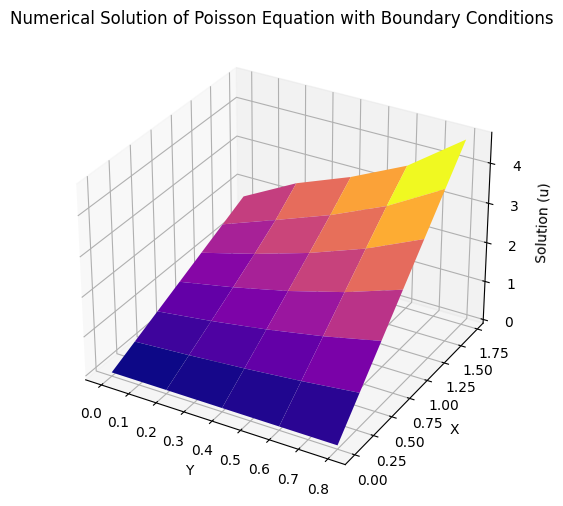

In [25]:
import numpy as np

Y, X = np.meshgrid(Y, X)
u = np.array(u)
# Plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, u, cmap='plasma')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Solution (u)')
ax.set_title('Numerical Solution of Poisson Equation with Boundary Conditions')
plt.show()